In [1]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings('ignore')



### Data Preparation


In [2]:
# load in the dataset into pandas dataframe
market_data=pd.read_csv('Market Basket Analysis - Groceries_dataset.csv')

In [3]:
data =market_data.copy()

In [4]:
#view the dataframe by checkig the fitst 5 entries of the dataframe
data.head()


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [5]:
#check the dimension of the dataframe
data.shape

(38765, 3)

In [6]:
# check basic iformation of each of the column in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


Observation; the dataframe has 38765 rows and 3 columns while there is no null values the date column appear to be store with object datatype and member_number with integer

In [7]:
# changing the date column to datetime datatype
data.Date =pd.to_datetime(data['Date'])
data.Member_number= data['Member_number'].astype('str')

In [8]:
# check if the date datatype has changed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  object        
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 908.7+ KB


In [9]:
#check for duplicate entries in the data
data.duplicated().sum()

759

In [10]:
data = data.drop_duplicates()


### Exploratory Data Analysis

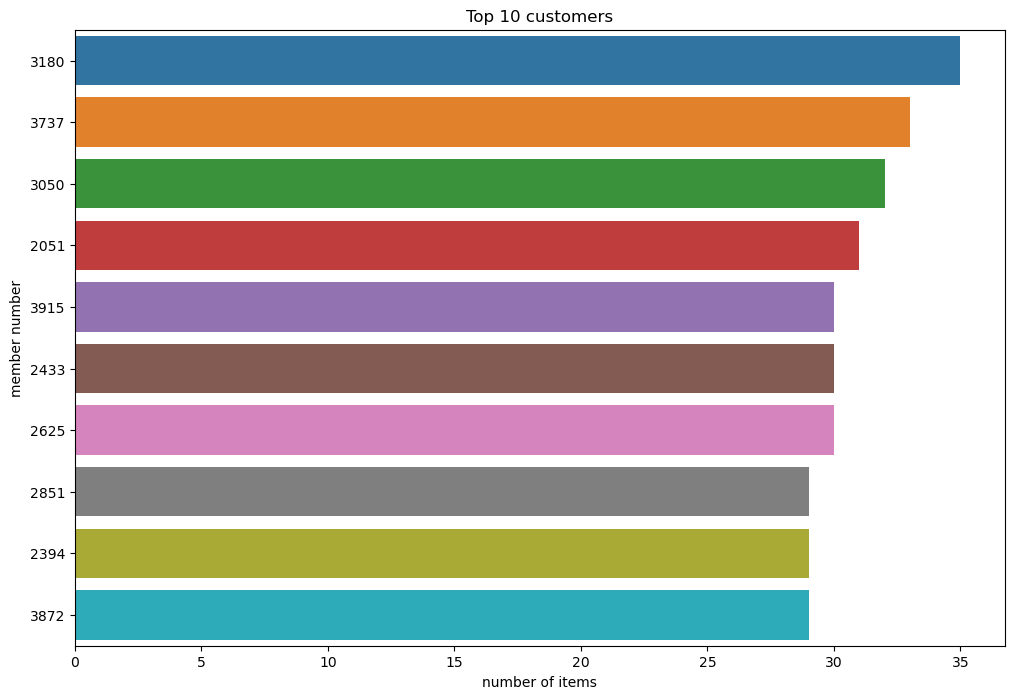

In [11]:
# top purchasing customers
top_customer= data['Member_number'].value_counts().sort_values(ascending =False).head(10)
top_customer
plt.figure(figsize=(12,8))
sns.color_palette("Set2")
sns.barplot(x=top_customer, y=top_customer.index)
plt.xlabel('number of items')
plt.ylabel('member number')
plt.title('Top 10 customers')
plt.show()

In [12]:
#number of unique items in the dataset
market_data.itemDescription.nunique()

167

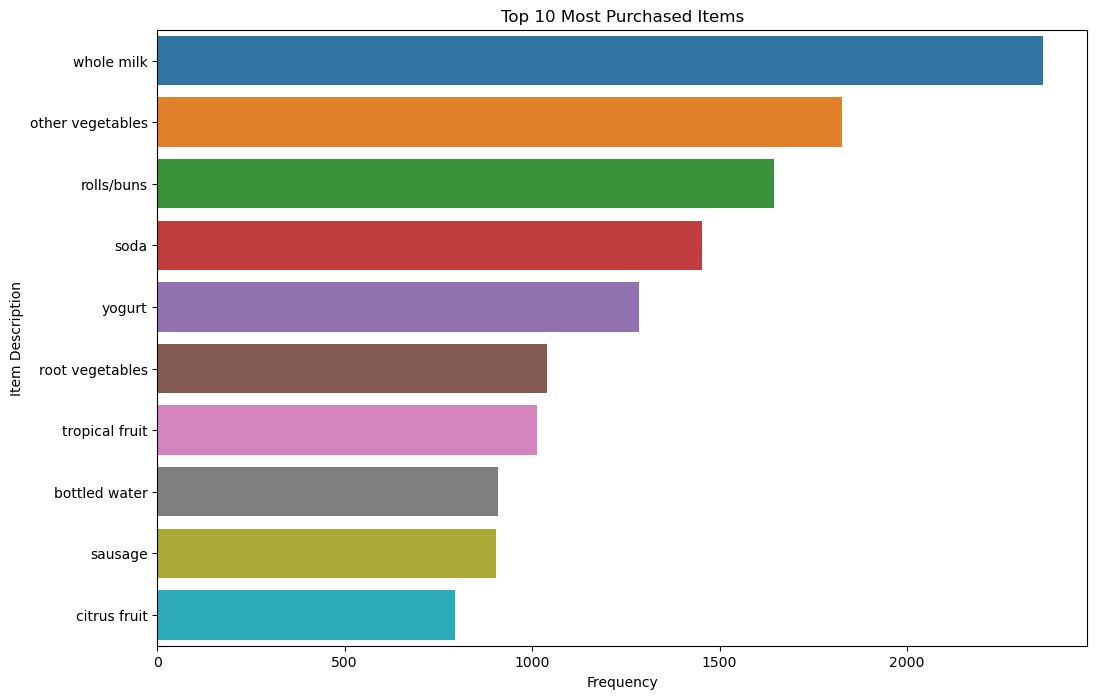

In [13]:
most_purchased= data['itemDescription'].value_counts().sort_values(ascending =False).head(10)
plt.figure(figsize=(12,8))
sns.barplot(x=most_purchased.values, y=most_purchased.index)
plt.xlabel('Frequency')
plt.ylabel('Item Description')
plt.title('Top 10 Most Purchased Items')
plt.show()

In [14]:
daily_purchase =data.set_index(['Date'])
monthly_purchase = daily_purchase.resample('M')['itemDescription'].count()

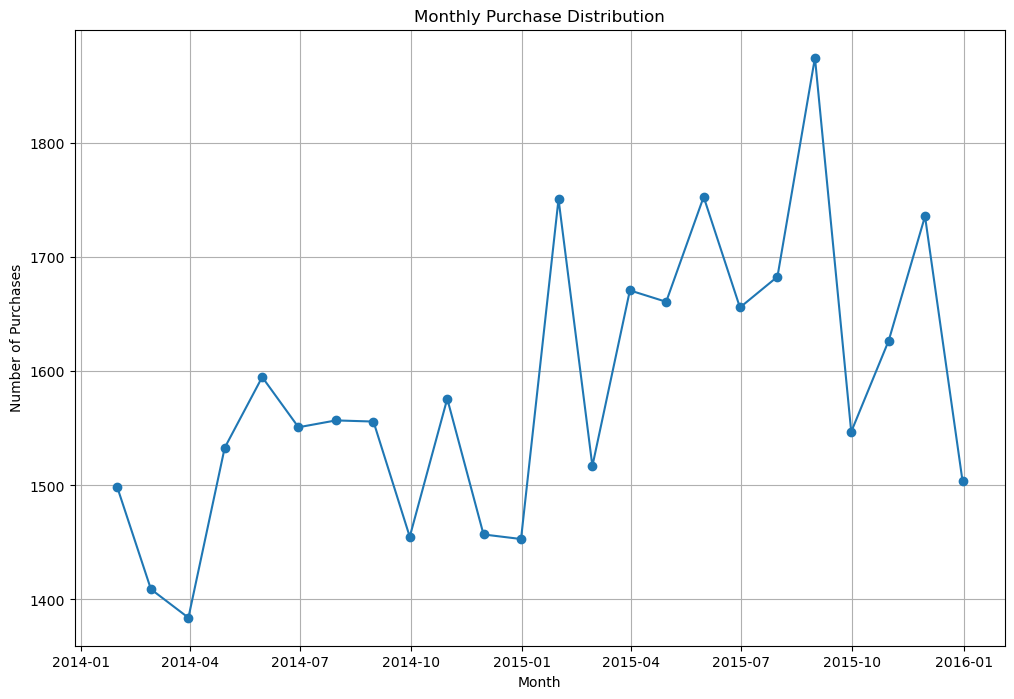

In [15]:
plt.figure(figsize=(12,8))
plt.plot(monthly_purchase.index, monthly_purchase.values, marker='o')
plt.grid(True)
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.title('Monthly Purchase Distribution')
plt.show()

Observation; The hihgest sales was in september 2019

### Market Basket Analysis

market basket analysis is use by stores to figure out what people will likely buy together.
they use this information to make decisions about how to stock their shelves,what to place side by side
and what discounts to offer. This can help them sell more products and make more money.



In [16]:
Basket = (data.groupby(['Member_number', 'itemDescription'])['itemDescription']
          .count().unstack().reset_index().fillna(0)
          .set_index('Member_number'))
Basket

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
Basket[Basket > 0] = 1

In [18]:
frequent_itemset = apriori(Basket, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemset, metric="lift")
rules.sort_values(by='zhangs_metric', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
58791,(whole milk),"(pastry, yogurt, ham)",0.458184,0.005644,0.005387,0.011758,2.083325,0.002801,1.006187,0.959731
54859,(whole milk),"(other vegetables, domestic eggs, meat)",0.458184,0.006414,0.005644,0.012318,1.920627,0.002705,1.005978,0.884685
44568,(whole milk),"(other vegetables, meat, brown bread)",0.458184,0.005900,0.005131,0.011198,1.897853,0.002427,1.005358,0.873153
69753,(whole milk),"(rolls/buns, yogurt, pip fruit, bottled water)",0.458184,0.005900,0.005131,0.011198,1.897853,0.002427,1.005358,0.873153
44357,(whole milk),"(curd, brown bread, soda)",0.458184,0.007696,0.006670,0.014558,1.891527,0.003144,1.006963,0.869901


In [ ]:
# Creating a matrix of product associations
product_associations = rules.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)

# Create a heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(product_associations, annot=True, cmap="PuBu", fmt=".1f", linewidths=.5)
plt.title("items frequently bought together")
plt.show()

